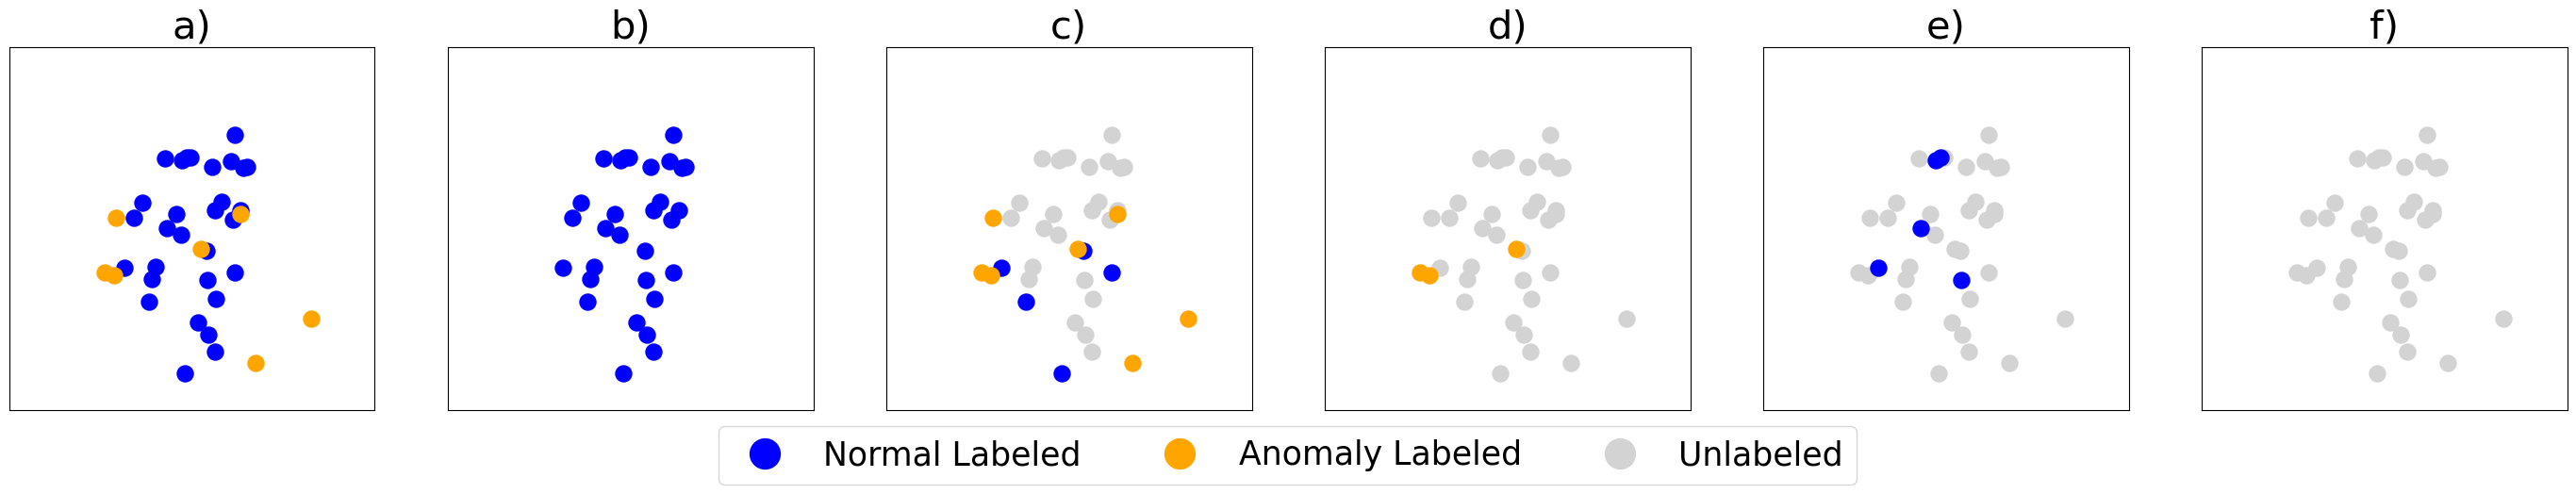

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples_cluster1 = 30
n_samples_cluster2 = 8
centers = [(0, 0), (0, 0)]  # Centers of the clusters
cluster_std = [0.05, 0.1]  # Smaller standard deviation for rounder clusters
pointsize=150
plt.figure(figsize=(35, 5))
# both
X, y = make_blobs(n_samples=[n_samples_cluster1, n_samples_cluster2], centers=centers, cluster_std=cluster_std, random_state=20)
plt.subplot(1, 6, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Normal',s=pointsize)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='orange', label='Anomaly',s=pointsize)
plt.title('a)')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xticks([])
plt.yticks([])

# only blue
plt.subplot(1, 6, 2)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Normal',s=pointsize)
plt.title('b)')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xticks([])
plt.yticks([])

# orange full some blue rest grey
blue_points = X[y == 0]
blue_points_indices = np.random.choice(len(blue_points), 5, replace=False)
plt.subplot(1, 6, 3)
plt.scatter(blue_points[~np.isin(np.arange(len(blue_points)), blue_points_indices)][:, 0], blue_points[~np.isin(np.arange(len(blue_points)), blue_points_indices)][:, 1], c='lightgrey', label='Normal (Unlabeled)',s=pointsize)
plt.scatter(blue_points[blue_points_indices][:, 0], blue_points[blue_points_indices][:, 1], c='blue', label='Normal (Blue)',s=pointsize)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='orange', label='Anomaly',s=pointsize)
plt.title('c)')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xticks([])
plt.yticks([])

# all grey expect for few orange
orange_points = X[y == 1]
orange_points_indices = np.random.choice(len(orange_points), 3, replace=False)
plt.subplot(1, 6, 4)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='lightgrey', label='Normal',s=pointsize)
plt.scatter(orange_points[~np.isin(np.arange(len(orange_points)), orange_points_indices)][:, 0], orange_points[~np.isin(np.arange(len(orange_points)), orange_points_indices)][:, 1], c='lightgrey', label='Anomaly (Grey)',s=pointsize)
plt.scatter(orange_points[orange_points_indices][:, 0], orange_points[orange_points_indices][:, 1], c='orange', label='Anomaly (Orange)',s=pointsize)
plt.title('d)')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xticks([])
plt.yticks([])

# all grey expect for few blue
blue_points_indices = np.random.choice(len(blue_points), 5, replace=False)
plt.subplot(1, 6, 5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='lightgrey', label='Anomaly',s=pointsize)
plt.scatter(blue_points[~np.isin(np.arange(len(blue_points)), blue_points_indices)][:, 0], blue_points[~np.isin(np.arange(len(blue_points)), blue_points_indices)][:, 1], c='lightgrey', label='Anomaly (Grey)',s=pointsize)
plt.scatter(blue_points[blue_points_indices][:, 0], blue_points[blue_points_indices][:, 1], c='blue', label='Anomaly (Orange)',s=pointsize)

plt.title('e)')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xticks([])
plt.yticks([])

# all grey
plt.subplot(1, 6, 6)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='lightgrey', label='Normal',s=pointsize)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='lightgrey', label='Anomaly',s=pointsize)
plt.title('f)')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xticks([])
plt.yticks([])

# Add a single legend for all subplots
legend_labels = ['Unlabeled', 'Anomaly Labeled', 'Normal Labeled']
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=25, label=legend_labels[2]),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=25, label=legend_labels[1]),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgrey', markersize=25, label=legend_labels[0]),
]

plt.legend(handles=legend_elements, loc='best',bbox_to_anchor=(-0.9, 0.0),  ncol=3, prop={'size': 25})

title_font_size = 30
for i in range(1, 7):
    plt.subplot(1, 6, i)
    plt.title(plt.gca().get_title(), fontsize=title_font_size)


#plt.tight_layout()
plt.show()


Automatically created module for IPython interactive environment


/tmp/ipykernel_346090/2278281581.py:45: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
/tmp/ipykernel_346090/2278281581.py:46: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


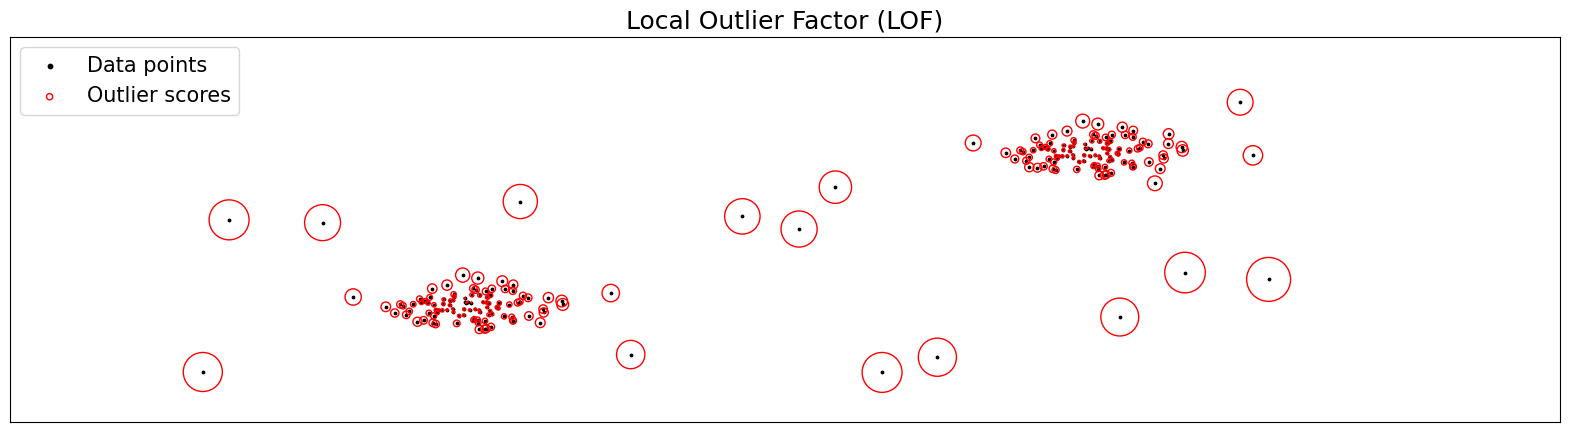

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)
plt.figure(figsize=(20, 5))
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)", fontsize=18)
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.xticks([])
plt.yticks([])

plt.xlabel("")
legend = plt.legend(loc='upper left', prop={'size': 15})
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()